In [29]:
import os, sys, tarfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
TR=0.8
from matplotlib import patches, ticker
import time
import pandas as pd
import glob

In [2]:
def subset_fc(fc,include):
    a=fc[include,:]
    a=a[:, include]
    return a

In [30]:
# Temporary to load labels
import pandas as pd
labels_dir = '/cnl/abcd/data/labels/' 
os.chdir(labels_dir)
labels=pd.read_csv('baseline_depr.csv',header=None, index_col=0)
labels.index.values[0]

'NDARINV08FUB58A'

In [4]:
len(labels[labels['depress_dsm5']==0])

1485

Anywhere there is repeated code, this is a dead giveaway to use functions/Object-oriented programming - here we are building a dataset, which should be its own class

Also note: try to never hardcode numbers (ie 1156 vs n_roi*n_roi)

In [6]:
# GET FC ONE HEMISPHERE
## One hemisphere FC 

n_roi=34
no_DDC=[]
missing_rois=[]
depr_files=[]
ctrl_files=[]
control_DDC=np.zeros((1518, n_roi, n_roi))
depress_DDC=np.zeros((267, n_roi, n_roi))
# control_cov=np.zeros((1851, n_roi, n_roi))
# depress_cov=np.zeros((1851, n_roi, n_roi))
control_DDC_vec=np.zeros((1518,1156))
depress_DDC_vec=np.zeros((267,1156))


DDC_path='/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/raw/'

j=0
k=0
# NOTE: YOU REUSE THIS. IT SHOULD BE A FUNCTION
for i in range(len(labels)):
    sub='sub-'+labels['src_subject_id'].values[i].split('_')[0]+labels['src_subject_id'].values[i].split('_')[1]
    files=glob.glob(DDC_path+sub+'/single_sessions'+'/filt_Delta L1H*.csv')
    
    for f in files:
        if os.path.exists(f):
            try:
                if labels['depress_dsm5'].values[i]==0:
                    control_DDC[j,:,:]=np.asarray(pd.read_csv(f, header=None))
                    control_DDC_vec[j,:] = np.reshape((abs(control_DDC[j,:,:])>0.1)*1, (1,1156)) # NOTE: why are you multiplying it by 1?
#                     control_cov[j,:,:]=np.asarray(pd.read_csv(DDC_path+sub+'/single_sessions'+'/filt_Cov2H.csv', header=None))
                    ctrl_files.append(f)
                    j=j+1
                else:
                    depress_DDC[k,:,:]=np.asarray(pd.read_csv(f, header=None))
#                     depress_cov[k,:,:]=np.asarray(pd.read_csv(DDC_path+sub+'/single_sessions'+'/filt_Cov2H.csv', header=None))
                    depress_DDC_vec[k,:] = np.reshape((abs(control_DDC[k,:,:])>0.1)*1, (1,1156)) # NOTE: should this be control or depress?
                    k=k+1
                    depr_files.append(f)

            except:
                print('missing ROIs')
                missing_rois.append(f)
        else:
            no_DDC.append(f)

        

missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs


In [31]:
# GET FC TWO HEMISPHERES
## Two hemispheres FC 

n_roi=68
no_DDC=[]
missing_rois=[]
depr_files=[]
ctrl_files=[]
control_DDC=np.zeros((1518, n_roi, n_roi))
depress_DDC=np.zeros((267, n_roi, n_roi))
# control_cov=np.zeros((1851, n_roi, n_roi))
# depress_cov=np.zeros((1851, n_roi, n_roi))
control_DDC_vec=np.zeros((1518,4624))
depress_DDC_vec=np.zeros((267,4624))


DDC_path='/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/raw/'

j=0
k=0
for i in range(len(labels)):
    sub='sub-'+labels['src_subject_id'].values[i].split('_')[0]+labels['src_subject_id'].values[i].split('_')[1]
    files=glob.glob(DDC_path+sub+'/single_sessions'+'/Reg*.csv')
    
    for f in files:
        if os.path.exists(f):
            try:
                if labels['depress_dsm5'].values[i]==0:
                    control_DDC[j,:,:]=np.asarray(pd.read_csv(f, header=None))
                    control_DDC_vec[j,:] = np.reshape((abs(control_DDC[j,:,:])>0.1)*1, (1,4624))
#                     control_cov[j,:,:]=np.asarray(pd.read_csv(DDC_path+sub+'/single_sessions'+'/filt_Cov2H.csv', header=None))
                    ctrl_files.append(f)
                    j=j+1
                else:
                    depress_DDC[k,:,:]=np.asarray(pd.read_csv(f, header=None))
#                     depress_cov[k,:,:]=np.asarray(pd.read_csv(DDC_path+sub+'/single_sessions'+'/filt_Cov2H.csv', header=None))
                    depress_DDC_vec[k,:] = np.reshape((abs(control_DDC[k,:,:])>0.1)*1, (1,4624))
                    k=k+1
                    depr_files.append(f)

            except:
                print('missing ROIs')
                missing_rois.append(f)
        else:
            no_DDC.append(f)

        

KeyError: 'src_subject_id'

In [8]:
# ALSO WE CAN MOVE THIS INTO THE BUILD_DATASET FUNCTION
control=np.reshape(control_DDC, (1518,4624))
depress=np.reshape(depress_DDC, (267,4624))

NOTE: See SynthSeg/scripts/postprocessing/StatisticalAnalysis.py - the analysis can be its own class

In [9]:
# non parametric statistical test for independent variables
# NOTE: NO HARDCODED NUMBERS EVER!
from scipy.stats import mannwhitneyu
s,p=mannwhitneyu(control,depress)
stat_diff=np.zeros(4624)
stat_diff[np.where(p<0.05)[0]]=1
stat_diff=np.reshape(stat_diff, (68,68))

In [10]:
plt.figure()
plt.imshow(stat_diff)

<IPython.core.display.Javascript object>

In [11]:
from scipy.stats import shapiro

stat,p =shapiro(control[300,:])
print(stat, p)

stat,p =shapiro(depress[1,:])
print(stat, p)

0.9115570187568665 1.401298464324817e-45
0.9292013645172119 2.7619592731842144e-42


Plotting can be a class or a function within a larger analysis class. Every separate step you do should be its own section of code that's modular and callable. 

In [12]:
# PLOT_WEIGHTS_ACROSS_STATES
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(control_DDC_vec.T,aspect='auto')
plt.colorbar()
# plt.clim([-0.05,0.05])
plt.ylabel('Connections')
plt.xlabel('Subjects')
plt.title('Control')
plt.subplot(122)
plt.imshow(depress_DDC_vec.T, aspect='auto')
# plt.clim([-0.05,0.05])
plt.title('Depression')
plt.ylabel('Connections')
plt.xlabel('Subjects')


<IPython.core.display.Javascript object>

Text(0.5, 0, 'Subjects')

In [13]:
# PLOT 2

sig_conn=np.reshape(sum(control_DDC_vec)/np.shape(control_DDC_vec)[0], (68,68))
sig_conn_D=np.reshape(sum(depress_DDC_vec)/np.shape(depress_DDC_vec)[0], (68,68))
plt.figure()
plt.title('Significant connection % across Control individuals')
plt.imshow(sig_conn,cmap='Greens')
plt.colorbar()
plt.figure()
plt.title('Significant connection % across Depressed individuals')
plt.imshow(sig_conn_D,cmap='Reds')
plt.colorbar()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# PLOT 2 (continued)

plt.figure()
plt.title('Significant connection abs difference')
plt.imshow(abs(sig_conn-sig_conn_D),cmap='Greys')
plt.colorbar()

<IPython.core.display.Javascript object>

In [15]:
# PLOT 3
plt.figure(figsize=(10,5))
plt.bar(np.arange(0,4624,1), sum(control_DDC_vec)/np.shape(control_DDC_vec)[0],label='Control')
plt.bar(np.arange(0,4624,1), sum(depress_DDC_vec)/np.shape(depress_DDC_vec)[0], label='Depress')
plt.xlabel('Connections#')
plt.ylabel('counts')
plt.legend()
plt.grid()
plt.ylim([0,1])
plt.title('Significant connections (abs(DDC)>0.1)')
# NOTE: did you want to keep this code below?
# plt.figure()
# plt.bar(np.arange(0,4624,1), sum(depress_DDC_vec))
# plt.xlabel('Connections')
# plt.ylabel('counts')

# plt.grid()

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Significant connections (abs(DDC)>0.1)')

In [16]:
# PLOT 4
import networkx as nx
ddc_plot=(sig_conn>0.8)
G = nx.from_numpy_array(ddc_plot)
pos=pd.read_csv('/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline/downloads/sub-NDARINV1L5VJRZG/ROIs_centroid_coordinates.csv')
pos=pos[30:]
plt.figure(figsize=(10,10))
plt.subplot(121)
nx.draw(G,np.asarray(pos[['x','y']]),with_labels=True)
plt.title('Control')
plt.subplot(122)
ddc_plot=(sig_conn_D>0.8)
G = nx.from_numpy_array(ddc_plot)
plt.title("Depressed")
nx.draw(G,np.asarray(pos[['x','y']]),with_labels=True)

<IPython.core.display.Javascript object>

In [17]:
# PLOT 5
fig=plt.figure(figsize=(10,10))
n=0
for i in range(25):
    ax = fig.add_subplot(5,5,n+1)
    plt.imshow(control_DDC[i,:,:])
    plt.clim([-0.5,0.5])

    plt.axis('off')
    n=n+1

# NOTE: didn't include this commented code
# fig=plt.figure(figsize=(10,10))
# n=0
# for i in range(100):
#     ax = fig.add_subplot(10,10,n+1)
#     plt.imshow(control_cov[i,:,:])
#     plt.clim([0,1])

#     plt.axis('off')
#     n=n+1

<IPython.core.display.Javascript object>

In [18]:
# PLOT_MEAN_WEIGHTS
avg_ddc_ctrl=np.nanmean(control_DDC, axis=0)
plt.figure()
plt.imshow(avg_ddc_ctrl)
plt.colorbar()
plt.clim([-0.05,0.05])
plt.title('average control DDC')

# avg_cov_ctrl=np.nanmean(control_cov, axis=0)
# plt.figure()
# plt.imshow(avg_cov_ctrl)
# plt.colorbar()
# plt.title('average control cov')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'average control DDC')

<IPython.core.display.Javascript object>


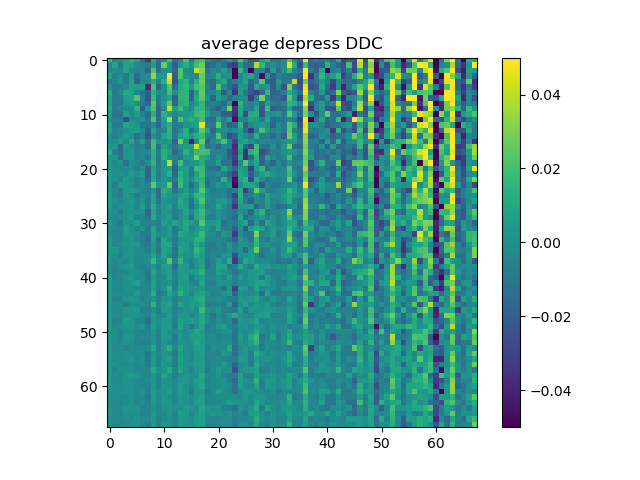

Text(0.5, 1.0, 'average depress DDC')

In [57]:
# PLOT_MEAN_WEIGHTS
avg_ddc_depr=np.nanmean(depress_DDC, axis=0)
plt.figure()
plt.imshow(avg_ddc_depr)
plt.clim([-0.05,0.05])
plt.colorbar()
plt.title('average depress DDC')

# avg_cov_depress=np.nanmean(depress_cov, axis=0)
# plt.figure()
# plt.imshow(avg_cov_depress)
# plt.colorbar()
# plt.title('average depress cov')

<IPython.core.display.Javascript object>


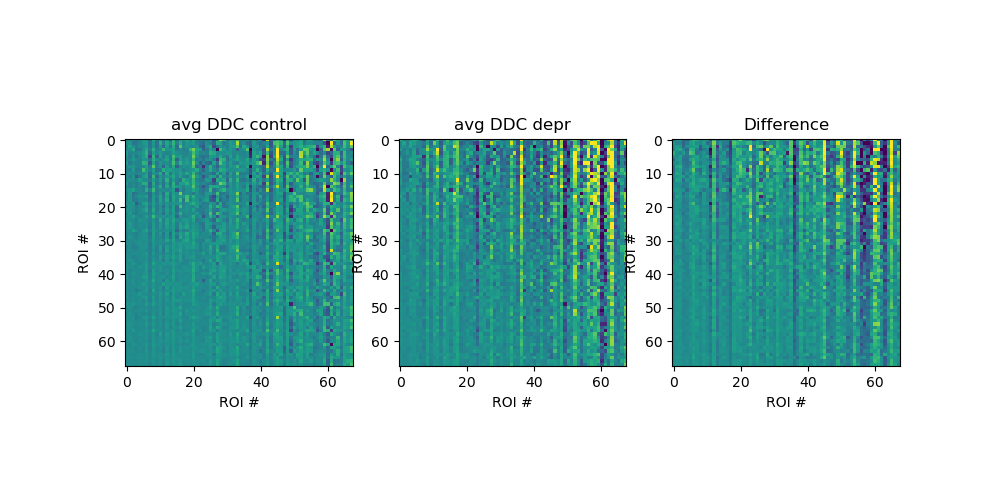

Text(0, 0.5, 'ROI #')

In [58]:
# PLOT_MEANS
plt.figure(figsize=(10,5))
plt.subplot(131)
im=plt.imshow(avg_ddc_ctrl)
plt.clim([-0.05,0.05])
plt.title('avg DDC control')
plt.xlabel('ROI #')
plt.ylabel('ROI #')
plt.subplot(132)
im=plt.imshow(avg_ddc_depr)
plt.clim([-0.05,0.05])
plt.title('avg DDC depr')
plt.xlabel('ROI #')
plt.ylabel('ROI #')
plt.subplot(133)
# Rho_diff
im=plt.imshow(avg_ddc_ctrl-avg_ddc_depr)
plt.clim([-0.05,0.05])
plt.title('Difference')
plt.xlabel('ROI #')
plt.ylabel('ROI #')
#plt.colorbar()

<IPython.core.display.Javascript object>


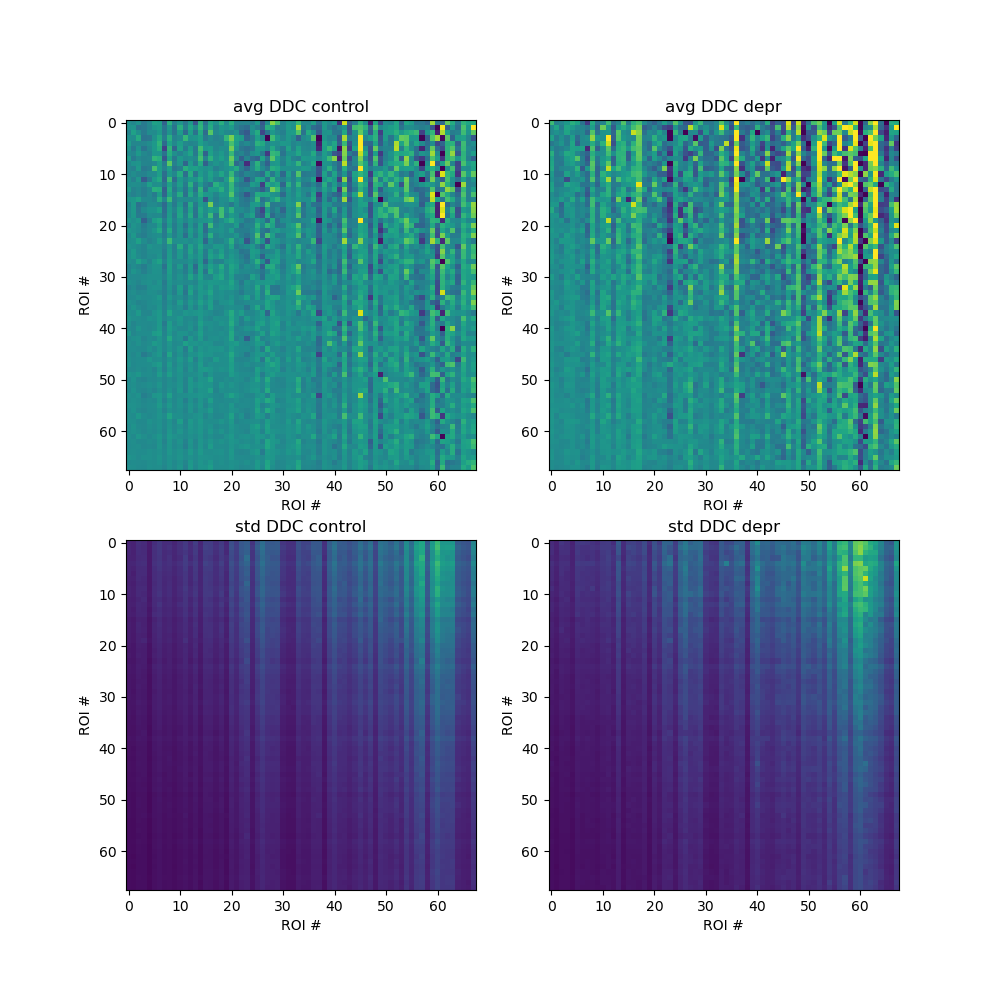

Text(0, 0.5, 'ROI #')

In [59]:
# PLOT 9
plt.figure(figsize=(10,10))
plt.subplot(221)
im=plt.imshow(avg_ddc_ctrl)
plt.clim([-0.05,0.05])
plt.title('avg DDC control')
plt.xlabel('ROI #')
plt.ylabel('ROI #')
plt.subplot(222)
im=plt.imshow(avg_ddc_depr)
plt.clim([-0.05,0.05])
plt.title('avg DDC depr')
plt.xlabel('ROI #')
plt.ylabel('ROI #')

plt.subplot(223)
ctrl_ddc_depr=np.nanstd(control_DDC, axis=0)
im=plt.imshow(ctrl_ddc_depr)
plt.clim([0,1])
plt.title('std DDC control')
plt.xlabel('ROI #')
plt.ylabel('ROI #')
plt.subplot(224)
std_ddc_depr=np.nanstd(depress_DDC, axis=0)
im=plt.imshow(std_ddc_depr)
plt.clim([0,1])
plt.title('std DDC depr')
plt.xlabel('ROI #')
plt.ylabel('ROI #')



<IPython.core.display.Javascript object>


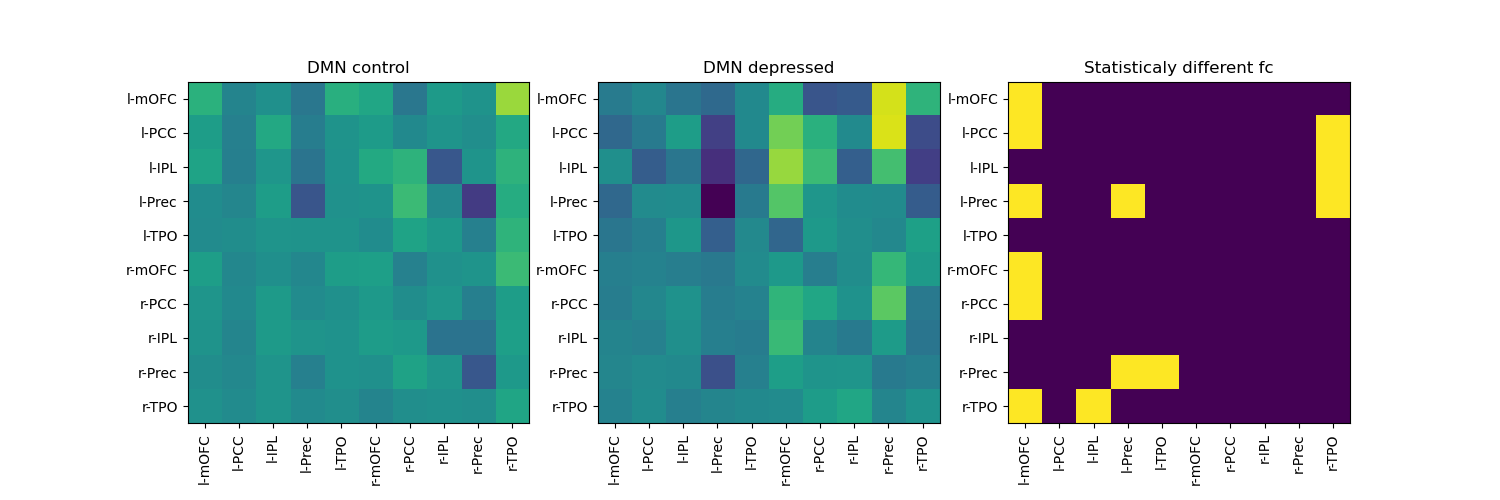

ctx-lh-medialorbitofrontal
ctx-lh-posteriorcingulate
ctx-lh-inferiorparietal
ctx-lh-precuneus
ctx-lh-temporalpole
ctx-rh-medialorbitofrontal
ctx-rh-posteriorcingulate
ctx-rh-inferiorparietal
ctx-rh-precuneus
ctx-rh-temporalpole


In [85]:
# PLOT_NETWORK_HEATMAP
# Default mode network
DMN=[12,21,6,23,31,46,55,40,57,65]
labels=['l-mOFC','l-PCC','l-IPL','l-Prec','l-TPO','r-mOFC','r-PCC','r-IPL','r-Prec','r-TPO']
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('DMN control')
a=subset_fc(avg_ddc_ctrl,DMN)
plt.imshow(a)
plt.yticks(np.arange(len(DMN)),labels)
plt.xticks(np.arange(len(DMN)),labels, rotation='vertical')
plt.clim([-0.05,0.05])
plt.subplot(132)
plt.title('DMN depressed')
a_d=subset_fc(avg_ddc_depr,DMN)
plt.imshow(a_d)
plt.yticks(np.arange(len(DMN)),labels)
plt.xticks(np.arange(len(DMN)),labels, rotation='vertical')
plt.clim([-0.05,0.05])
plt.subplot(133)


DMN_control=control_DDC[:,DMN,:]
DMN_control=DMN_control[:,:,DMN]

DMN_depr=depress_DDC[:,DMN,:]
DMN_depr=DMN_depr[:,:,DMN]


# non parametric statistical test for independent variables
from scipy.stats import mannwhitneyu
s,p=mannwhitneyu(DMN_control,DMN_depr)

plt.imshow(p<0.05)
plt.yticks(np.arange(len(DMN)),labels)
plt.xticks(np.arange(len(DMN)),labels, rotation='vertical')
plt.title('Statisticaly different fc')

# plt.title('DMN abs difference')
# plt.imshow(abs(a-a_d))
# plt.yticks(np.arange(len(DMN)),labels)
# plt.xticks(np.arange(len(DMN)),labels, rotation='vertical')
for r in DMN:
    print(Desikan_ROIs[r])

<IPython.core.display.Javascript object>


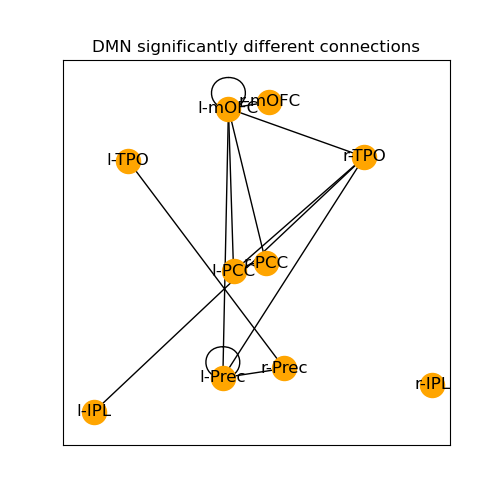

Text(0.5, 1.0, 'DMN significantly different connections')

In [106]:
# PLOT_NETWORK
import networkx as nx
# ddc_plot=(sig_conn>0.8)
G = nx.from_numpy_array(p<0.05)
pos=pd.read_csv('/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline/downloads/sub-NDARINV1L5VJRZG/ROIs_centroid_coordinates.csv')
pos=pos[30:]
coord_list=np.asarray(pos[['x','y']])
plt.figure(figsize=(5,5))
labeldict = {}
for i in range(len(DMN)):
    labeldict[i]=labels[i]
nx.draw_networkx(G,coord_list[DMN,:],node_color='orange',with_labels=True,labels=labeldict)
plt.title('DMN significantly different connections')


<IPython.core.display.Javascript object>


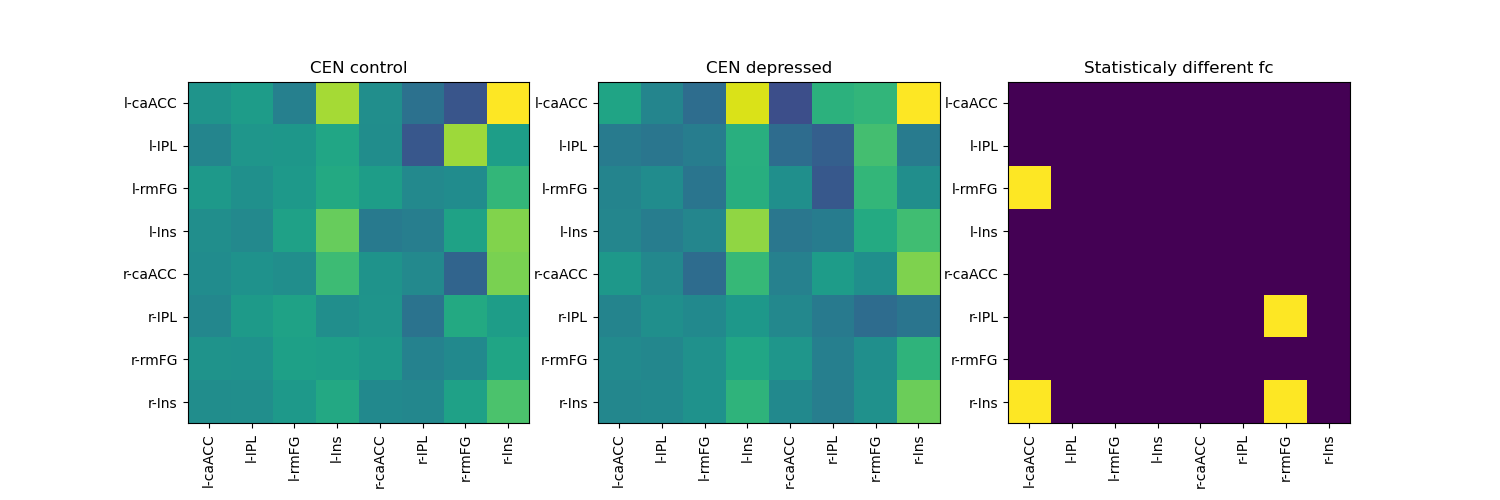

ctx-lh-caudalanteriorcingulate
ctx-lh-inferiorparietal
ctx-lh-rostralmiddlefrontal
ctx-lh-insula
ctx-rh-caudalanteriorcingulate
ctx-rh-inferiorparietal
ctx-rh-rostralmiddlefrontal
ctx-rh-insula


In [83]:
# PLOT_NETWORK_HEATMAP
# Central executive network
CEN=[1,6,25,33,35,40,59,67]
labels_cen=['l-caACC', 'l-IPL','l-rmFG','l-Ins','r-caACC', 'r-IPL','r-rmFG','r-Ins']
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('CEN control')
a=subset_fc(avg_ddc_ctrl,CEN)
plt.yticks(np.arange(len(CEN)),labels_cen)
plt.xticks(np.arange(len(CEN)),labels_cen, rotation='vertical')
plt.imshow(a)
plt.clim([-0.05,0.05])
plt.subplot(132)
plt.title('CEN depressed')
a_d=subset_fc(avg_ddc_depr,CEN)
plt.imshow(a_d)
plt.yticks(np.arange(len(CEN)),labels_cen)
plt.xticks(np.arange(len(CEN)),labels_cen, rotation='vertical')
plt.clim([-0.05,0.05])
plt.subplot(133)
# plt.title('CEN abs difference')
# plt.imshow(abs(a-a_d))
# plt.xticks(np.arange(len(CEN)),labels_cen, rotation='vertical')



CEN_control=control_DDC[:,CEN,:]
CEN_control=CEN_control[:,:,CEN]

CEN_depr=depress_DDC[:,CEN,:]
CEN_depr=CEN_depr[:,:,CEN]


# non parametric statistical test for independent variables
from scipy.stats import mannwhitneyu
s,p_cen=mannwhitneyu(CEN_control,CEN_depr)

plt.imshow(p_cen<0.05)
plt.yticks(np.arange(len(CEN)),labels_cen)
plt.xticks(np.arange(len(CEN)),labels_cen, rotation='vertical')
plt.title('Statisticaly different fc')

for r in CEN:
    print(Desikan_ROIs[r])

<IPython.core.display.Javascript object>


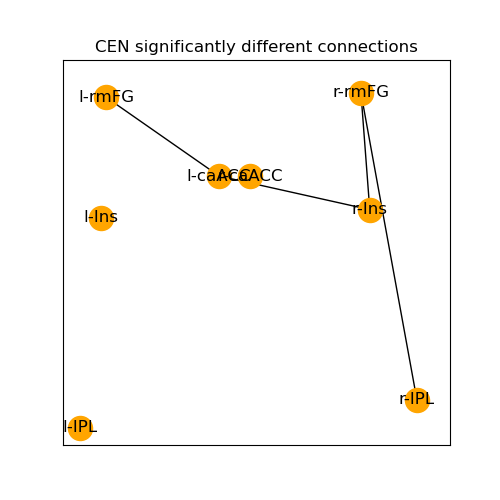

Text(0.5, 1.0, 'CEN significantly different connections')

In [109]:
# PLOT_NETWORK
import networkx as nx
# ddc_plot=(sig_conn>0.8)
G = nx.from_numpy_array(p_cen<0.05)

plt.figure(figsize=(5,5))
labeldict = {}
for i in range(len(CEN)):
    labeldict[i]=labels_cen[i]
nx.draw_networkx(G,coord_list[CEN,:],node_color='orange',with_labels=True,labels=labeldict)
plt.title('CEN significantly different connections')

<IPython.core.display.Javascript object>


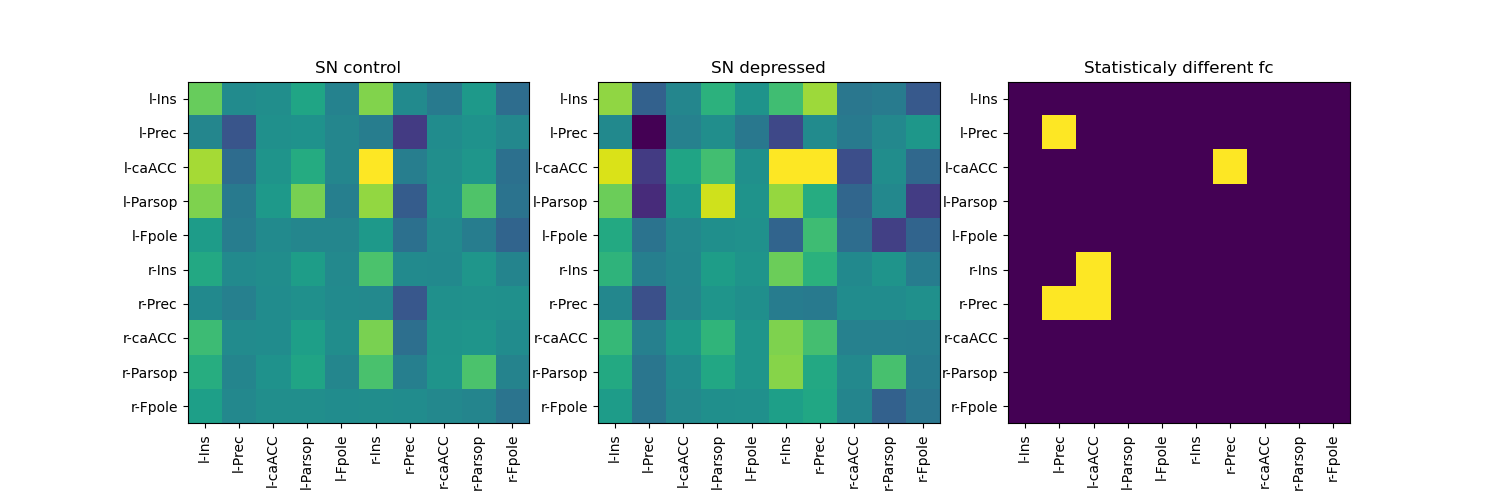

ctx-lh-insula
ctx-lh-precuneus
ctx-lh-caudalanteriorcingulate
ctx-lh-parsopercularis
ctx-lh-frontalpole
ctx-rh-insula
ctx-rh-precuneus
ctx-rh-caudalanteriorcingulate
ctx-rh-parsopercularis
ctx-rh-frontalpole


In [84]:
# PLOT_NETWORK_HEATMAP
# Salience network
SN=[33,23,1,16,30,67,57,35,50,64]
labels_sn=['l-Ins','l-Prec','l-caACC', 'l-Parsop','l-Fpole','r-Ins','r-Prec','r-caACC', 'r-Parsop','r-Fpole']
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('SN control')
a=subset_fc(avg_ddc_ctrl,SN)
plt.yticks(np.arange(len(SN)),labels_sn)
plt.xticks(np.arange(len(SN)),labels_sn, rotation='vertical')
plt.imshow(a)
plt.clim([-0.05,0.05])
plt.subplot(132)
plt.title('SN depressed')
a_d=subset_fc(avg_ddc_depr,SN)
plt.imshow(a_d)
plt.yticks(np.arange(len(SN)),labels_sn)
plt.xticks(np.arange(len(SN)),labels_sn, rotation='vertical')
plt.clim([-0.05,0.05])
plt.subplot(133)
# plt.title('SN abs difference')
# plt.imshow(abs(a-a_d))
# plt.xticks(np.arange(len(SN)),labels_sn, rotation='vertical')


SN_control=control_DDC[:,SN,:]
SN_control=SN_control[:,:,SN]

SN_depr=depress_DDC[:,SN,:]
SN_depr=SN_depr[:,:,SN]


# non parametric statistical test for independent variables
from scipy.stats import mannwhitneyu
s,p_sn=mannwhitneyu(SN_control,SN_depr)

plt.imshow(p_sn<0.05)
plt.yticks(np.arange(len(SN)),labels_sn)
plt.xticks(np.arange(len(SN)),labels_sn, rotation='vertical')
plt.title('Statisticaly different fc')

for r in SN:
    print(Desikan_ROIs[r])


<IPython.core.display.Javascript object>


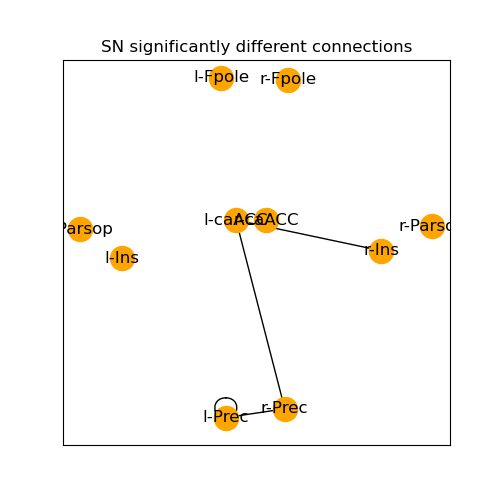

Text(0.5, 1.0, 'SN significantly different connections')

In [110]:
# PLOT_NETWORK
import networkx as nx
# ddc_plot=(sig_conn>0.8)
G = nx.from_numpy_array(p_sn<0.05)

plt.figure(figsize=(5,5))
labeldict = {}
for i in range(len(SN)):
    labeldict[i]=labels_sn[i]
nx.draw_networkx(G,coord_list[SN,:],node_color='orange',with_labels=True,labels=labeldict)
plt.title('SN significantly different connections')

<IPython.core.display.Javascript object>


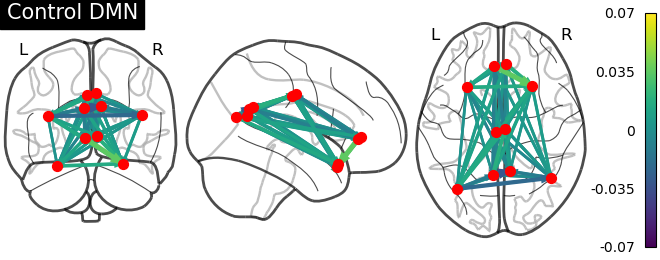

In [270]:
# We now make a synthetic connectivity matrix that connects labels
# between left and right hemispheres.
from nilearn import datasets, plotting
import matplotlib 
coord_list=np.asarray(pos[['x','y','z']])
n_parcels = len(coord_list)
a=subset_fc(avg_ddc_ctrl,DMN)

plotting.plot_connectome(a, coord_list[DMN,:], node_color='r',edge_cmap=None, edge_vmax=0.07,title='Control DMN',colorbar=True, )



plotting.show()

<IPython.core.display.Javascript object>


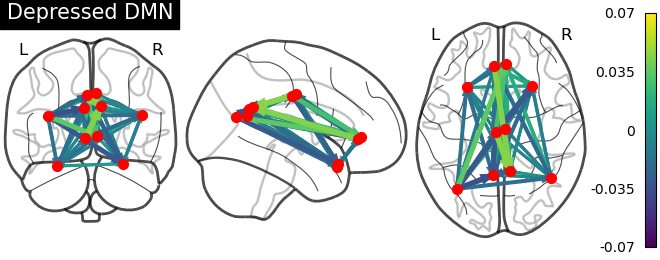

In [252]:
# We now make a synthetic connectivity matrix that connects labels
# between left and right hemispheres.
from nilearn import datasets, plotting
coord_list=np.asarray(pos[['x','y','z']])
n_parcels = len(coord_list)
a=subset_fc(avg_ddc_depr,DMN)

plotting.plot_connectome(a, coord_list[DMN,:],node_color='r',edge_cmap=None, edge_vmax=0.07,title='Depressed DMN',colorbar=True)
plotting.show()

<IPython.core.display.Javascript object>


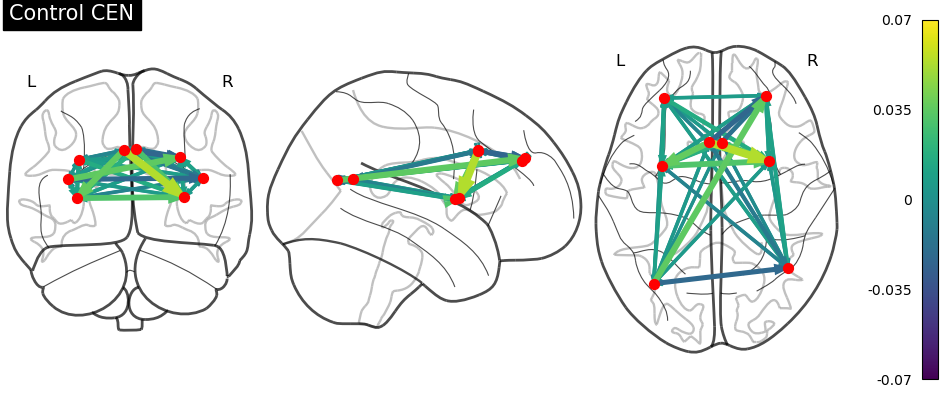

In [224]:
# We now make a synthetic connectivity matrix that connects labels
# between left and right hemispheres.
from nilearn import datasets, plotting
coord_list=np.asarray(pos[['x','y','z']])
n_parcels = len(coord_list)
a=subset_fc(avg_ddc_ctrl,CEN)

plotting.plot_connectome(a, coord_list[CEN,:],node_color='r',edge_cmap=None, edge_vmax=0.07,title='Control CEN',colorbar=True, )
plotting.show()

<IPython.core.display.Javascript object>


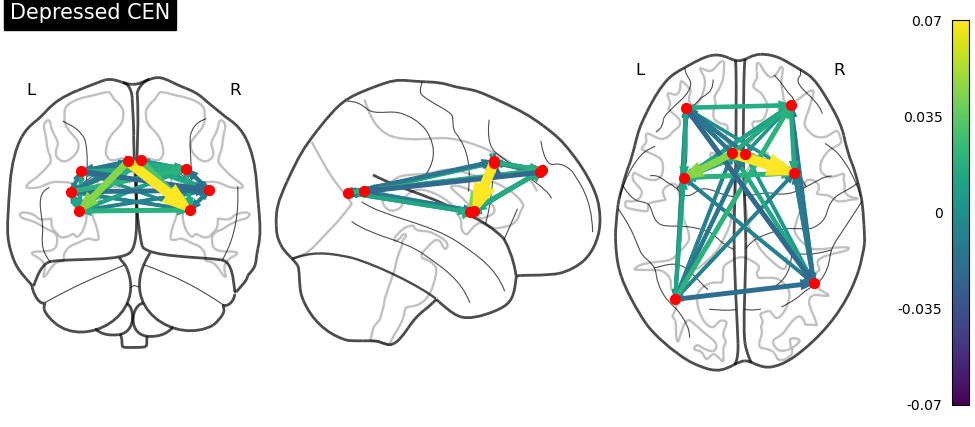

In [225]:
# We now make a synthetic connectivity matrix that connects labels
# between left and right hemispheres.
from nilearn import datasets, plotting
coord_list=np.asarray(pos[['x','y','z']])
n_parcels = len(coord_list)
a=subset_fc(avg_ddc_depr,CEN)

plotting.plot_connectome(a, coord_list[CEN,:],node_color='r',edge_cmap=None, edge_vmax=0.07,title='Depressed CEN',colorbar=True)
plotting.show()

<IPython.core.display.Javascript object>


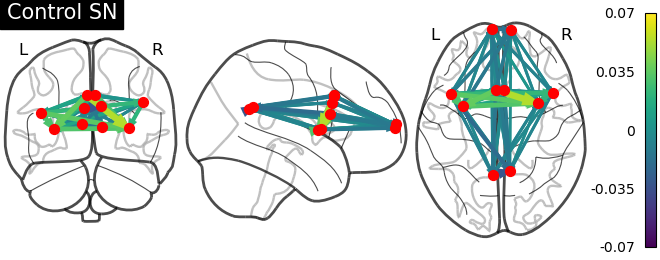

In [241]:
# We now make a synthetic connectivity matrix that connects labels
# between left and right hemispheres.
from nilearn import datasets, plotting
coord_list=np.asarray(pos[['x','y','z']])
n_parcels = len(coord_list)
a=subset_fc(avg_ddc_ctrl,SN)

plotting.plot_connectome(a, coord_list[SN,:],node_color='r',edge_cmap=None, edge_vmax=0.07,title='Control SN',colorbar=True, )
plotting.show()

<IPython.core.display.Javascript object>


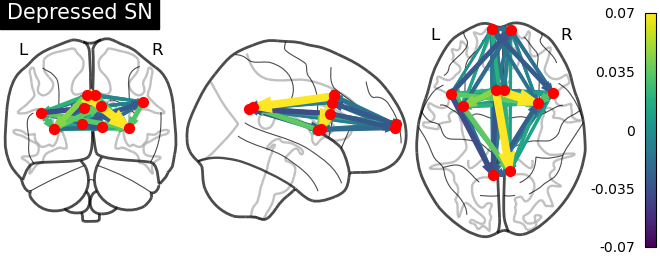

In [242]:
# We now make a synthetic connectivity matrix that connects labels
# between left and right hemispheres.
from nilearn import datasets, plotting
coord_list=np.asarray(pos[['x','y','z']])
n_parcels = len(coord_list)
a=subset_fc(avg_ddc_depr,SN)

plotting.plot_connectome(a, coord_list[SN,:],node_color='r',edge_cmap=None, edge_vmax=0.07,title='Depressed SN',colorbar=True)
plotting.show()

<IPython.core.display.Javascript object>


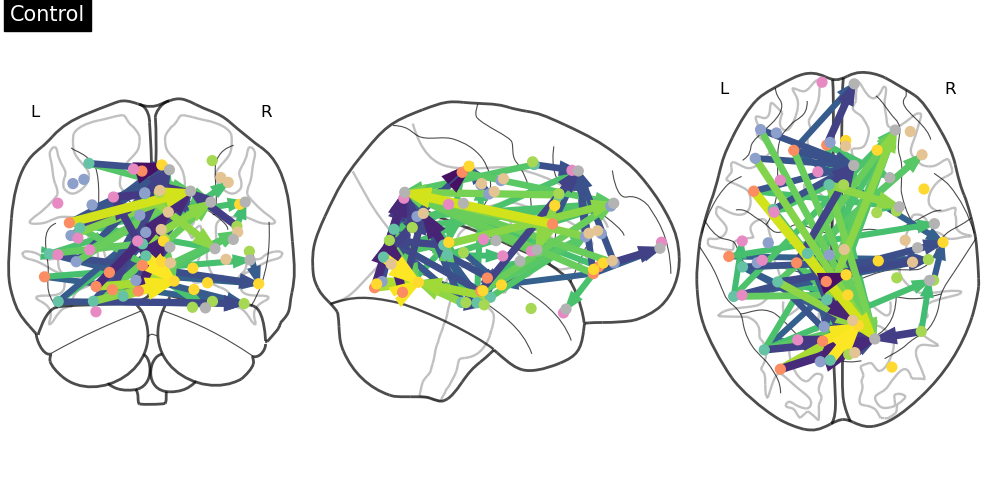

In [146]:
# We now make a synthetic connectivity matrix that connects labels
# between left and right hemispheres.
from nilearn import datasets, plotting
coord_list=np.asarray(pos[['x','y','z']])
n_parcels = len(coord_list)

plotting.plot_connectome(avg_ddc_ctrl, coord_list,edge_cmap=None,edge_threshold="98%", title='Control')
plotting.show()

In [150]:
view = plotting.view_connectome(avg_ddc_ctrl, coord_list, edge_cmap=None,edge_threshold="98%", title='Control',symmetric_cmap=False)
# uncomment this to open the plot in a web browser:
view.open_in_browser()
# view

/home/acamassa/anaconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning: you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True
  warnings.warn('you have specified symmetric_cmap=False '


<IPython.core.display.Javascript object>


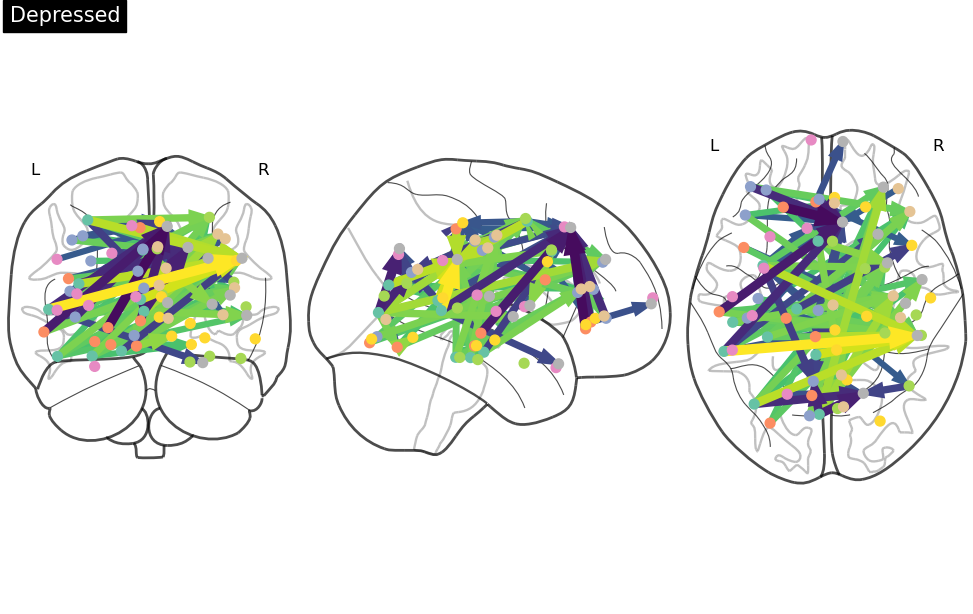

In [145]:

plotting.plot_connectome(avg_ddc_depr, coord_list,edge_cmap=None,edge_threshold="98%",title='Depressed')
plotting.show()

In [169]:
# PLOT_MEANS
n_roi=68
no_DDC=[]
missing_rois=[]
depr_files=[]
ctrl_files=[]

control_cov=np.zeros((1518, n_roi, n_roi))
depress_cov=np.zeros((267, n_roi, n_roi))
control_cov_vec=np.zeros((1518,4624))
depress_cov_vec=np.zeros((267,4624))


DDC_path='/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/raw/'

j=0
k=0
for i in range(len(labels)):
    sub='sub-'+labels['src_subject_id'].values[i].split('_')[0]+labels['src_subject_id'].values[i].split('_')[1]
    files=glob.glob(DDC_path+sub+'/single_sessions'+'/filt_Cov2H*.csv')
    
    for f in files:
        if os.path.exists(f):
            try:
                if labels['depress_dsm5'].values[i]==0:
                    control_cov[j,:,:]=np.asarray(pd.read_csv(f, header=None))
                    control_cov_vec[j,:] = np.reshape((abs(control_cov[j,:,:])>0.8)*1, (1,4624))
                    ctrl_files.append(f)
                    j=j+1
                else:
                    depress_cov[k,:,:]=np.asarray(pd.read_csv(f, header=None))
                    depress_cov_vec[k,:] = np.reshape((abs(control_cov[k,:,:])>0.8)*1, (1,4624))
                    k=k+1
                    depr_files.append(f)

            except:
                print('missing ROIs')
                missing_rois.append(f)
        else:
            no_DDC.append(f)

        

missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs
missing ROIs


<IPython.core.display.Javascript object>


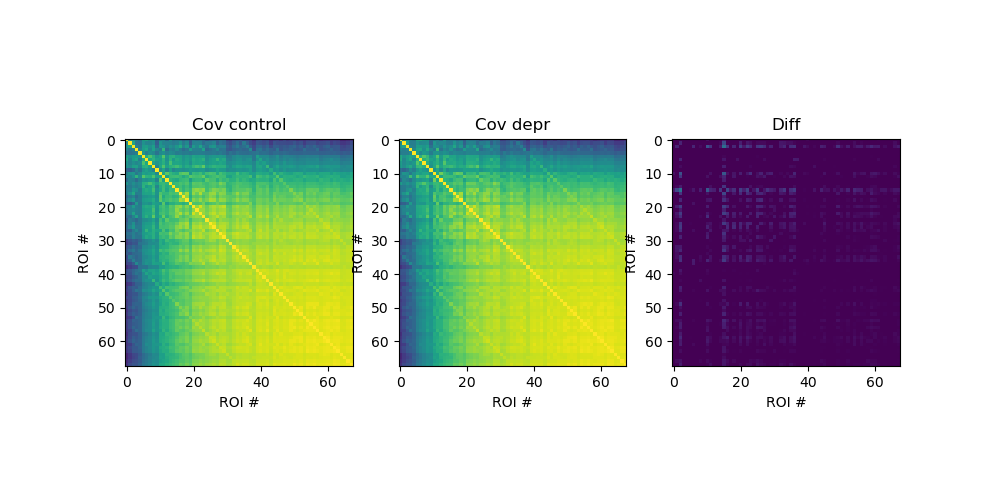

Text(0, 0.5, 'ROI #')

In [164]:
plt.figure(figsize=(10,5))
plt.subplot(131)
avg_cov_ctrl=np.nanmean(control_cov,axis=0)
im=plt.imshow(avg_cov_ctrl)
plt.clim([0,1])
plt.title('Cov control')
plt.xlabel('ROI #')
plt.ylabel('ROI #')
plt.subplot(132)
avg_cov_depress=np.nanmean(depress_cov,axis=0)
im=plt.imshow(avg_cov_depress)
plt.clim([0,1])
plt.title('Cov depr')
plt.xlabel('ROI #')
plt.ylabel('ROI #')
plt.subplot(133)
# Rho_diff
im=plt.imshow(avg_cov_ctrl-avg_cov_depress)
plt.clim([0,0.1])
plt.title('Diff')
plt.xlabel('ROI #')
plt.ylabel('ROI #')
#plt.colorbar()

<IPython.core.display.Javascript object>


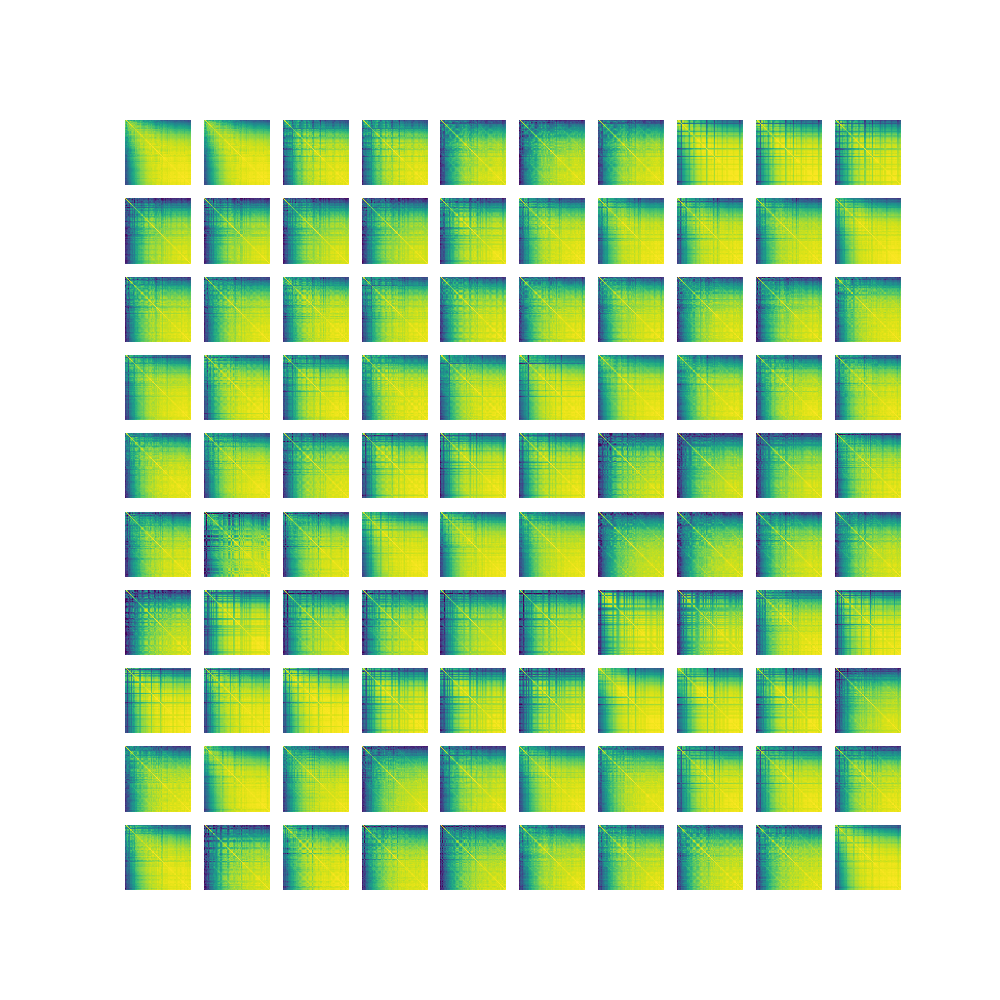

In [165]:
fig=plt.figure(figsize=(10,10))
n=0
for i in range(100):
    ax = fig.add_subplot(10,10,n+1)
    plt.imshow(control_cov[i,:,:])
    plt.clim([0,1])

    plt.axis('off')
    n=n+1

<IPython.core.display.Javascript object>


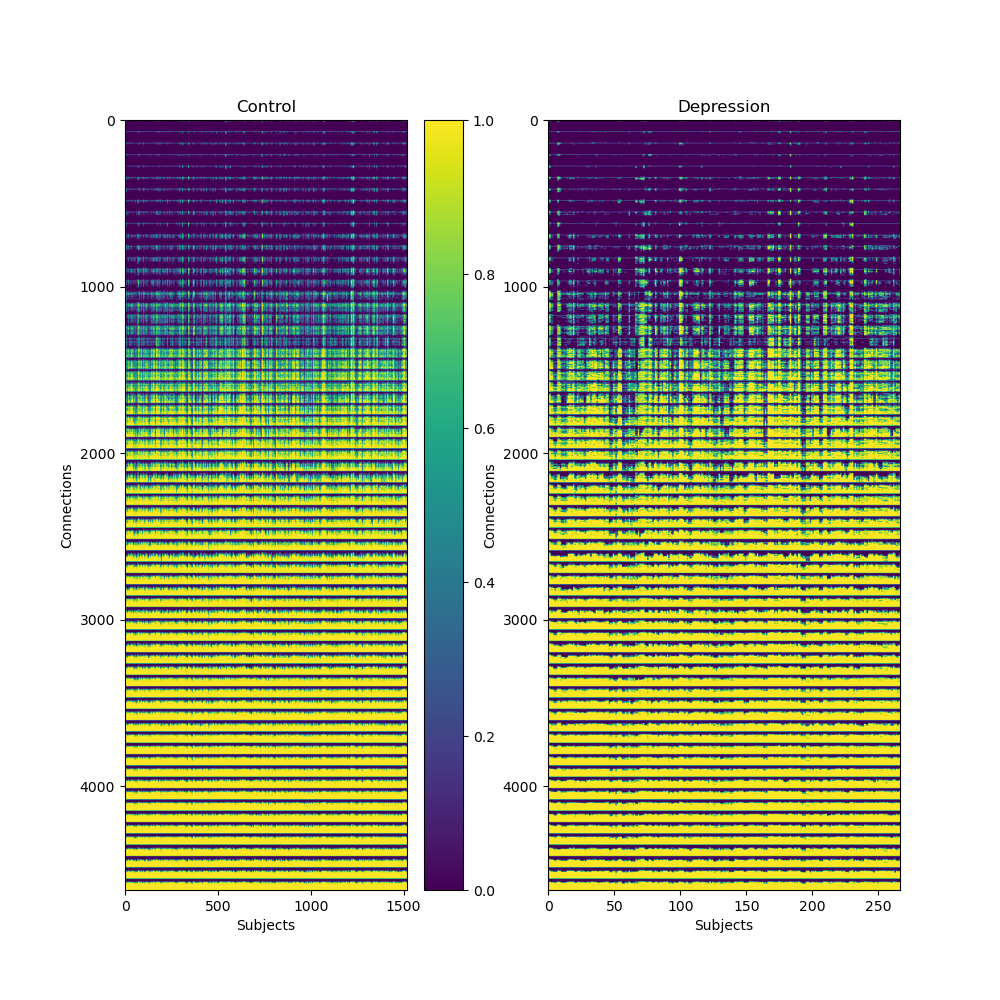

Text(0.5, 0, 'Subjects')

In [170]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(control_cov_vec.T,aspect='auto')
plt.colorbar()
# plt.clim([-0.05,0.05])
plt.ylabel('Connections')
plt.xlabel('Subjects')
plt.title('Control')
plt.subplot(122)
plt.imshow(depress_cov_vec.T, aspect='auto')
# plt.clim([-0.05,0.05])
plt.title('Depression')
plt.ylabel('Connections')
plt.xlabel('Subjects')

In [1]:
Desikan_ROIs=['ctx-lh-bankssts', 'ctx-lh-caudalanteriorcingulate',
        'ctx-lh-caudalmiddlefrontal', 'ctx-lh-cuneus',
        'ctx-lh-entorhinal', 'ctx-lh-fusiform', 'ctx-lh-inferiorparietal',
        'ctx-lh-inferiortemporal', 'ctx-lh-isthmuscingulate',
        'ctx-lh-lateraloccipital', 'ctx-lh-lateralorbitofrontal',
        'ctx-lh-lingual', 'ctx-lh-medialorbitofrontal',
        'ctx-lh-middletemporal', 'ctx-lh-parahippocampal',
        'ctx-lh-paracentral', 'ctx-lh-parsopercularis',
        'ctx-lh-parsorbitalis', 'ctx-lh-parstriangularis',
        'ctx-lh-pericalcarine', 'ctx-lh-postcentral',
        'ctx-lh-posteriorcingulate', 'ctx-lh-precentral',
        'ctx-lh-precuneus', 'ctx-lh-rostralanteriorcingulate',
        'ctx-lh-rostralmiddlefrontal', 'ctx-lh-superiorfrontal',
        'ctx-lh-superiorparietal', 'ctx-lh-superiortemporal',
        'ctx-lh-supramarginal', 'ctx-lh-frontalpole',
        'ctx-lh-temporalpole', 'ctx-lh-transversetemporal',
        'ctx-lh-insula', 'ctx-rh-bankssts',
        'ctx-rh-caudalanteriorcingulate', 'ctx-rh-caudalmiddlefrontal',
        'ctx-rh-cuneus', 'ctx-rh-entorhinal', 'ctx-rh-fusiform',
        'ctx-rh-inferiorparietal', 'ctx-rh-inferiortemporal',
        'ctx-rh-isthmuscingulate', 'ctx-rh-lateraloccipital',
        'ctx-rh-lateralorbitofrontal', 'ctx-rh-lingual',
        'ctx-rh-medialorbitofrontal', 'ctx-rh-middletemporal',
        'ctx-rh-parahippocampal', 'ctx-rh-paracentral',
        'ctx-rh-parsopercularis', 'ctx-rh-parsorbitalis',
        'ctx-rh-parstriangularis', 'ctx-rh-pericalcarine',
        'ctx-rh-postcentral', 'ctx-rh-posteriorcingulate',
        'ctx-rh-precentral', 'ctx-rh-precuneus',
        'ctx-rh-rostralanteriorcingulate', 'ctx-rh-rostralmiddlefrontal',
        'ctx-rh-superiorfrontal', 'ctx-rh-superiorparietal',
        'ctx-rh-superiortemporal', 'ctx-rh-supramarginal',
        'ctx-rh-frontalpole', 'ctx-rh-temporalpole',
        'ctx-rh-transversetemporal', 'ctx-rh-insula']

In [19]:
Desikan_ROIs[31]

'ctx-lh-temporalpole'

In [172]:
len(Desikan_ROIs)

68

In [ ]:
DMN=[25,21,6,23,31]

[2,25,21,23,28,13,6,36,59,55,57,62,47,40]

caudalmiddlefrontal 2
rostralmiddlefrontal 25

posterior cyngulate 21

# precuneus 23

# superiortemporal 28
# middletemporal 13
inferior parietal lobe 6

In [ ]:
CEN=[1,6,25,33]
[26,2,25,1,24,27,6,60,36,59,35,58,61,40]

superiorfrontal 26
# caudalmiddlefrontal 2
rostralmiddlefrontal 25

# caudalanteriorcingulate 1
# rostralanteriorcingulate 24

# superiorparietal 27

inferiorparietal 6

In [ ]:
SN=[33,1,24,31, 67,35,58,65]
anterior insula 33
caudalanteriorcingulate 1
rostralanteriorcingulate 24


temporalpole 31

In [27]:
DMN=[2,25,21,23,28,13,6]

In [28]:
for i in DMN:
    print(i+34)

36
59
55
57
62
47
40


In [197]:
Desikan_ROIs[21]

'ctx-lh-posteriorcingulate'

In [179]:
Desikan_ROIs[28]

'ctx-lh-superiortemporal'

In [180]:
Desikan_ROIs[25+34]

'ctx-rh-rostralmiddlefrontal'

In [ ]:
 dorsolateral prefrontal cortex and posterior parietal cortex, with particular activity along the intraparietal sulcus. 